# GRIP : The Spark Foundation (Data Science and Business Analytics Intern)
Graduate Rotational Internship Program

## Author : Prathmesh Jagtap

# Task 1
## Prediction using Supervised ML

### (Level - Beginner)

* ***Predict the percentage of an student based on the no. of study hours.***
* ***This is a simple linear regression task as it involves just 2 variables.***
* ***You can use R, Python, SAS Enterprise Miner or any other tool***
* ***Data can be found at http://bit.ly/w-data***
* ***What will be predicted score if a student studies for 9.25 hrs/ day?***

### Importing all required liberaries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
stud_score = pd.read_csv("Student_Score.csv")
stud_score.head()
# head() is used to fetching top 5 rows of the given dataset by default.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
stud_score.tail()
# tail() is used to fetching top 5 bottom rows of the given dataset by default.

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
stud_score.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
stud_score.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
print("Dimension of given dataset: ",stud_score.ndim)

Dimension of given dataset:  2


In [7]:
print("size of data :", stud_score.shape)
# i.e; row size = 25 & column size = 2

size of data : (25, 2)


In [8]:
stud_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
stud_score.describe().transpose()
# Here, By describe() functon we can easily find the nean, standard deviation 
# and minimun, maximum of data

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [30]:
stud_score.isnull().sum() # checking for null values

Hours     0
Scores    0
dtype: int64

In [29]:
stud_score.corr() #Correlation between data

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualizing data

<AxesSubplot:>

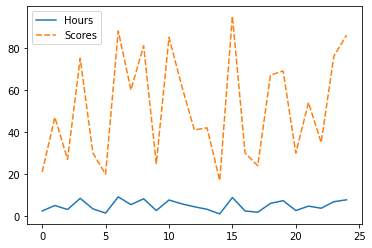

In [14]:
sns.lineplot(data=stud_score)

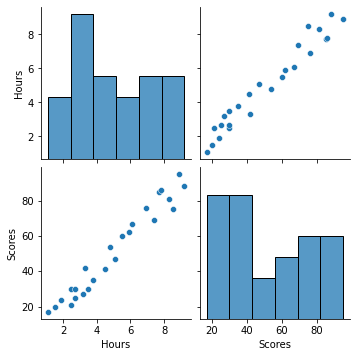

In [12]:
sns.pairplot(data = stud_score, palette="Set2", height=2.5)

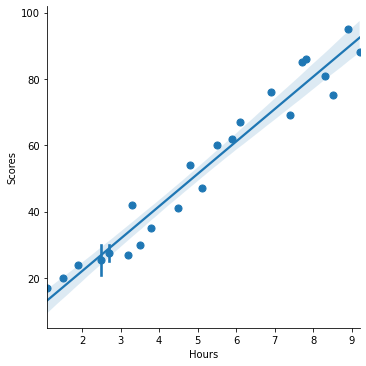

In [13]:
sns.lmplot(x="Hours", y="Scores", data=stud_score, x_estimator=np.mean);

<function matplotlib.pyplot.show(close=None, block=None)>

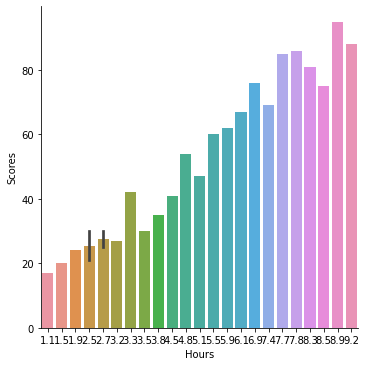

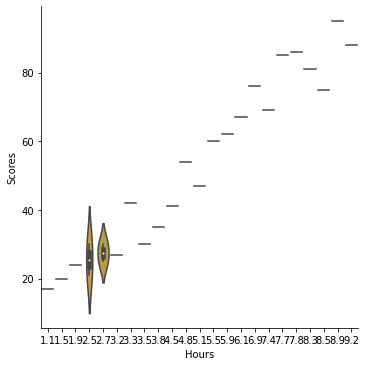

In [15]:
sns.catplot(x="Hours", y="Scores",  kind="bar", data=stud_score)
sns.catplot(x="Hours", y="Scores",  kind="violin", data=stud_score)
plt.show

### Spliting the data 

In [16]:
# taking feature set(x) and target set(y)
x = stud_score.iloc[:, :1]
y = stud_score.iloc[:, 1]

### Training and Testing the data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
print("Size of the training set :", x_train.shape, y_train.shape)
print("Size of the testing set :", x_test.shape, y_test.shape)

Size of the training set : (17, 1) (17,)
Size of the testing set : (8, 1) (8,)


In [18]:
# fiting the data
lr = LinearRegression()
trainset = lr.fit(x_train, y_train)
test_pred = lr.predict(x_test)
test_pred

array([16.3158208 , 52.56027486, 34.43804783, 33.43125744, 46.51953252,
       75.71645385, 12.28865924, 56.58743642])

In [19]:
test_pred - y_test

5    -3.684179
1     5.560275
13   -7.561952
2     6.431257
12    5.519533
19    6.716454
14   -4.711341
7    -3.412564
Name: Scores, dtype: float64

In [20]:
lr.coef_ #m

array([10.06790391])

In [21]:
lr.intercept_ #c

1.2139649388594052

In [47]:
# lets predict
y_pred = lr.predict([[9.25]])
y_pred
print(f"If the students studies 9.25 hours per day he will get {y_pred} score as per are prediction model.".format())

If the students studies 9.25 hours per day he will get [94.34207607] score as per are prediction model.


In [40]:
# y = mx + c
pred = 10.06755514*9.25 + 1.4054739079778429
pred

94.53035895297785

### Now Visualizing the  prediction by Linear Regression model

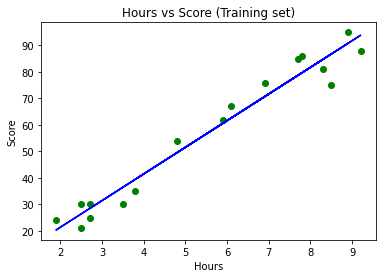

In [24]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(x_train, y_train, color='green')
viz_train.plot(x_train, lr.predict(x_train), color='blue')
viz_train.title('Hours vs Score (Training set)')
viz_train.xlabel('Hours')
viz_train.ylabel('Score')
viz_train.show()

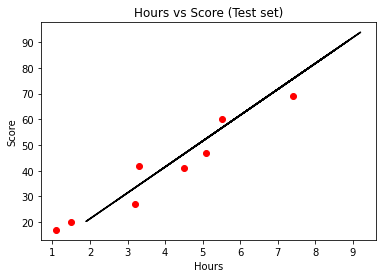

In [25]:
# Visualizing the Test set results
viz_test = plt
viz_test.scatter(x_test, y_test, color='red')
viz_test.plot(x_train, lr.predict(x_train), color='black')
viz_test.title('Hours vs Score (Test set)')
viz_test.xlabel('Hours')
viz_test.ylabel('Score')
viz_test.show()

### Final Prediction

In [33]:
# Output
lr.score(x_test, y_test)*100

89.44542088325093

### Saving Model using pickle module

In [27]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)
 
# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)
